# Статистический анализ данных сервиса аренды самокатов

GoFast - популярный сервис для аренды самокатов, в нашем распоряжении данные о пользователях сервиса и их поездах.  
Совершать поездки можно с помощью мобильного приложения с подпиской ultra или без неё (от этого зависит принцип расчёта стоимости поездки).  
Необходимо проанализировать:  
- Частоту встречаемости городов (пользователи из каких городов и в каком соотнощении представлены в наборе данных);  
- Соотношение количества пользователей с подпиской и без;  
- Распределение пользователей по возрасту;  
- Расстояние, которое пользователи преодолевают в течение одной поездки;  
- Длительность поездки.  

Посредством проверки статистических гипотез необходимо выяснить:  
- Тратят ли пользователи с подпиской больше времени на поездки?  
- Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?  
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Данные о пользователях содержатся в датасете users:
- `user_id` — идентификатор пользователя;
- `name` — имя;  
- `age` — возраст;  
- `city` — город;
- `subscription_type` — тип подписки;

Информация о поездках отражена в rides:  
- `user_id` — идентификатор пользователя;  
- `distance` — расстояние, которое пользователь проехал в течение одной сессии (м.);  
- `duration` — продолжительность поездки (мин.);  
- `date` — дата совершения поездки;  

Тарифы подписок представлены в subscriptions:
- `subscription_type` — тип подписки;  
- `minute_price` — стоимость одной минуты поездки;  
- `start_ride_price` — стоимость начала поездки;  
- `subscription_fee` — стоимость ежемесячного платежа;

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [ ]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('users.csv')
    rides = pd.read_csv('rides_go.csv')
    subscriptions = pd.read_csv('subscriptions_go.csv')

In [ ]:
# Определим функцию для вывода основной информации о датасете
def data_info(df):
    display(df.head(20))
    print()
    display(df.describe())
    print()
    print(df.info())

In [ ]:
data_info(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


In [ ]:
data_info(rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


In [ ]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В наборе данных `users`, содержащем информацию о пользователях, типы данных указаны корректно, пропущенных значений нет.  
В датасете `rides` также нет пропусков, однако требуется преобразовать дату из типа object в datetime.  
В subscriptions представлены характеристики соответсвующих типов подписки.

#### Шаг 2. Предобработка данных

In [ ]:
# Преобразуем переменную date к типу DateTime
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [ ]:
# Проверим, данные за сколько лет содержатся в датасете
rides['date'].dt.year.unique()

array([2021])

In [ ]:
# Выделим номера месяца в отдельную переменную
rides['month'] = rides['date'].dt.month

In [ ]:
# Проверим наличие дубликатов
print(f'Количество дубликатов в users: {users.duplicated().sum()}')
print(f'Количество дубликатов в rides: {rides.duplicated().sum()}')

Количество дубликатов в users: 31
Количество дубликатов в rides: 0


In [ ]:
# Выведем дубликаты
for i in users[users.duplicated()]['user_id']:
    display(users[users['user_id'] == i])

,user_id,name,age,city,subscription_type
292,293,Агата,26,Краснодар,ultra
1534,293,Агата,26,Краснодар,ultra


,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra


,user_id,name,age,city,subscription_type
908,909,Константин,20,Екатеринбург,free
1536,909,Константин,20,Екатеринбург,free


,user_id,name,age,city,subscription_type
402,403,Полина,19,Сочи,ultra
1537,403,Полина,19,Сочи,ultra


,user_id,name,age,city,subscription_type
907,908,Рустам,30,Тюмень,free
1538,908,Рустам,30,Тюмень,free


,user_id,name,age,city,subscription_type
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra


,user_id,name,age,city,subscription_type
126,127,Павел,25,Пятигорск,ultra
1540,127,Павел,25,Пятигорск,ultra


,user_id,name,age,city,subscription_type
658,659,Злата,27,Ростов-на-Дону,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra


,user_id,name,age,city,subscription_type
203,204,Руслан,30,Пятигорск,ultra
1542,204,Руслан,30,Пятигорск,ultra


,user_id,name,age,city,subscription_type
152,153,Герман,23,Москва,ultra
1543,153,Герман,23,Москва,ultra


,user_id,name,age,city,subscription_type
1244,1245,Регина,27,Пятигорск,free
1544,1245,Регина,27,Пятигорск,free


,user_id,name,age,city,subscription_type
806,807,Александр,28,Екатеринбург,free
1545,807,Александр,28,Екатеринбург,free


,user_id,name,age,city,subscription_type
923,924,Мария,23,Пятигорск,free
1546,924,Мария,23,Пятигорск,free


,user_id,name,age,city,subscription_type
634,635,Герман,21,Москва,ultra
1547,635,Герман,21,Москва,ultra


,user_id,name,age,city,subscription_type
135,136,Марсель,25,Тюмень,ultra
1548,136,Марсель,25,Тюмень,ultra


,user_id,name,age,city,subscription_type
107,108,Влада,29,Тюмень,ultra
1549,108,Влада,29,Тюмень,ultra


,user_id,name,age,city,subscription_type
736,737,Мелания,27,Ростов-на-Дону,free
1550,737,Мелания,27,Ростов-на-Дону,free


,user_id,name,age,city,subscription_type
665,666,Зарина,29,Москва,ultra
1551,666,Зарина,29,Москва,ultra


,user_id,name,age,city,subscription_type
296,297,Егор,33,Пятигорск,ultra
1552,297,Егор,33,Пятигорск,ultra


,user_id,name,age,city,subscription_type
120,121,Алина,25,Пятигорск,ultra
1553,121,Алина,25,Пятигорск,ultra


,user_id,name,age,city,subscription_type
1197,1198,Демид,29,Ростов-на-Дону,free
1554,1198,Демид,29,Ростов-на-Дону,free


,user_id,name,age,city,subscription_type
71,72,Никита,25,Москва,ultra
1555,72,Никита,25,Москва,ultra


,user_id,name,age,city,subscription_type
421,422,Кирилл,27,Сочи,ultra
1556,422,Кирилл,27,Сочи,ultra


,user_id,name,age,city,subscription_type
610,611,Владимир,28,Омск,ultra
1557,611,Владимир,28,Омск,ultra


,user_id,name,age,city,subscription_type
1236,1237,Евгения,23,Тюмень,free
1558,1237,Евгения,23,Тюмень,free


,user_id,name,age,city,subscription_type
208,209,Андрей,23,Омск,ultra
1559,209,Андрей,23,Омск,ultra


,user_id,name,age,city,subscription_type
828,829,Федор,29,Пятигорск,free
1560,829,Федор,29,Пятигорск,free


,user_id,name,age,city,subscription_type
808,809,Юрий,26,Сочи,free
1561,809,Юрий,26,Сочи,free


,user_id,name,age,city,subscription_type
306,307,Ясмина,19,Краснодар,ultra
1562,307,Ясмина,19,Краснодар,ultra


,user_id,name,age,city,subscription_type
46,47,Юрий,28,Тюмень,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,name,age,city,subscription_type
1044,1045,Артемий,28,Ростов-на-Дону,free
1564,1045,Артемий,28,Ростов-на-Дону,free


In [ ]:
# Удалим дубликаты
users = users.drop_duplicates()
print(f'Количество дубликатов в users: {users.duplicated().sum()}')

Количество дубликатов в users: 0


In [ ]:
# Посчитаем количество пропусков в данных
print('Количество пропущенных значений в users:')
print(users.isna().sum())
print()
print('Количество пропущенных значений в rides:')
print(rides.isna().sum())

Количество пропущенных значений в users:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Количество пропущенных значений в rides:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


В ходе предобработки были выполненны следующие шаги:  
- Преобразован тип данных в переменной `date` из object в datetime;  
- Выделены в отдельный признак номера месяцев;  
- Найдены и удалены дубликаты;  
- Данные проверены на наличие пропущенных значений (не обнаружено).

#### Шаг 3. Исследовательский анализ данных

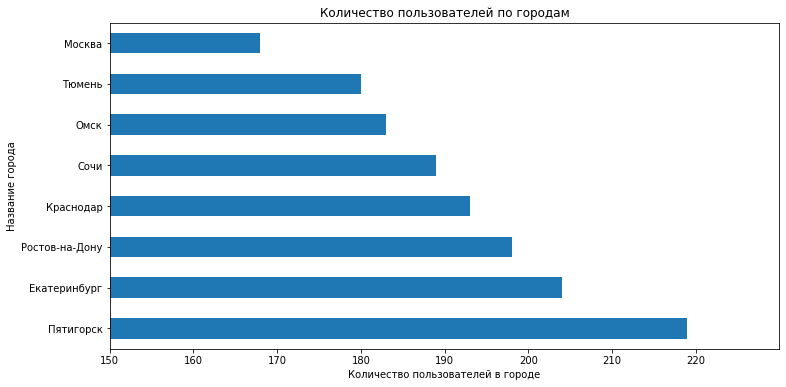

In [ ]:
# Визуализируем частоту встречаемости городов
users['city'].value_counts()\
             .plot(kind='barh',
                   figsize=(12, 6))
plt.title('Количество пользователей по городам')
plt.ylabel('Название города')
plt.xlabel('Количество пользователей в городе')
plt.xlim(left=150) # Отбросила значения до 150, т.к. городов с меньшей частотой в датасете не представлено.
plt.show()

In [ ]:
print('Доля встречаемости каждого города:')
print(round(users['city'].value_counts()/
            users['city'].count(), 2))

Доля встречаемости каждого города:
Пятигорск         0.14
Екатеринбург      0.13
Ростов-на-Дону    0.13
Краснодар         0.13
Сочи              0.12
Омск              0.12
Тюмень            0.12
Москва            0.11
Name: city, dtype: float64


Больше всего пользователей в Пятигорске, меньше всего в Москве, однако в процентном соотношении разница составляет около 3%.

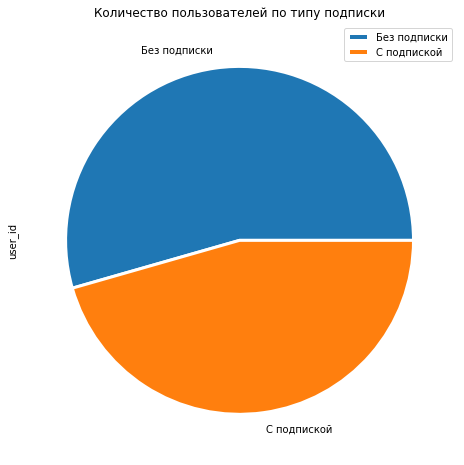

In [ ]:
# Соотношение пользователей с подпиской и без подписки
users.pivot_table(
    index='subscription_type',
    values='user_id',
    aggfunc='count')\
    .rename(index={
    'free': 'Без подписки',
    'ultra': 'С подпиской'})\
    .plot(kind='pie',
          figsize=(8,8),
          subplots=True,
          wedgeprops = { 'linewidth' : 3,
                         'edgecolor' : 'white' })
plt.title('Количество пользователей по типу подписки')
plt.show();

In [ ]:
print('Доля пользователей с подпиской:',
      round(users.query('subscription_type == "ultra"')
      ['user_id'].count()/users['user_id'].count(), 2))
print('Доля пользователей без подписки:',
      round(users.query('subscription_type == "free"')
      ['user_id'].count()/users['user_id'].count(), 2))

Доля пользователей с подпиской: 0.46
Доля пользователей без подписки: 0.54


Пользователей с подпиской на 8% меньше, чем без подписки.

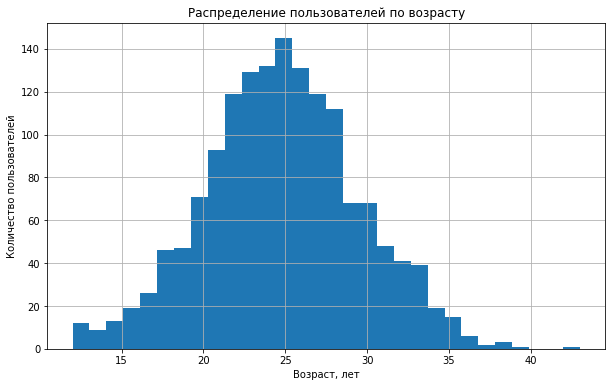

In [ ]:
# Возраст пользователей
users['age'].plot(
    kind='hist',
    grid=True,
    bins=30,
    figsize=(10,6))
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей')
plt.show();

In [ ]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Распределение пользователей по возрасту можно описать нормальным законом распределения, средний возраст совпадает с медианным и составляет 25 лет, аномальных значений не обнаружено: самому юному пользователю 12 лет, самому взрослому - 43.

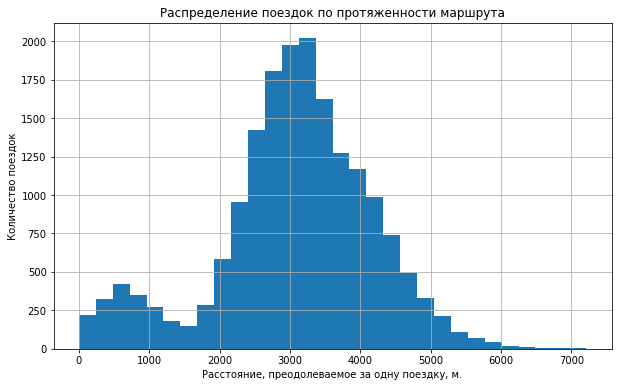

In [ ]:
# Расстояние, которое пользователь преодолел за одну поездку
rides['distance'].plot(
    kind='hist',
    bins=30,
    grid=True,
    figsize=(10,6))
plt.title('Распределение поездок по протяженности маршрута')
plt.xlabel('Расстояние, преодолеваемое за одну поездку, м.')
plt.ylabel('Количество поездок')
plt.show();

In [ ]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Распределение поездок по протяженности маршрута также близко к нормальному, среднее расстояние составляет 3070,66, а медианное - 3133,61. При этом помимо основного пика распределения на промежутке 3000 - 3200 м. можно увидеть, что относительно часто встречаются и поездки от 200 до 1000 м.

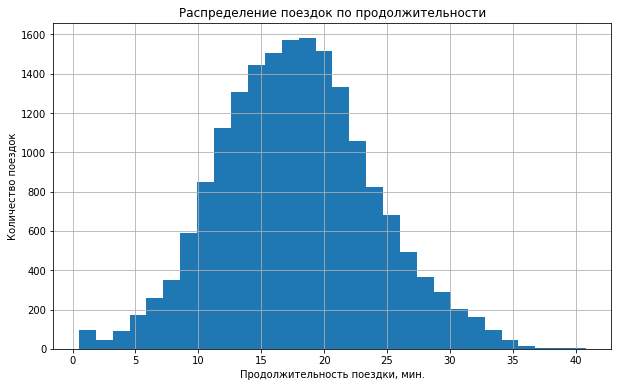

In [ ]:
# Продолжительность поездок
rides['duration'].plot(
    kind='hist',
    bins=30,
    grid=True,
    figsize=(10,6))
plt.title('Распределение поездок по продолжительности')
plt.xlabel('Продолжительность поездки, мин.')
plt.ylabel('Количество поездок')
plt.show();

In [ ]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Распределение поездок по продолжительности также можно описать нормальным законом распределения, средняя длительность (17,8) почти совпадает с медианной (17,7), аномально больших значений не обнаружено, но самая короткая поездка составила половину минуты. Не будем удалять это значение, поскольку в датасете есть поездки на небольшие расстояния и это значение может быть не выбросом.

#### Шаг 4. Объединение данных

In [ ]:
# Объединим данные
df = pd.merge(left=rides, right=users, on='user_id')
df = df.merge(subscriptions, on='subscription_type')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [ ]:
df.head(15)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [ ]:
# Разделим данные о пользователях с подпиской и без на два датафрейма
df_free = df.query('subscription_type == "free"')
df_ultra = df.query('subscription_type == "ultra"')

In [ ]:
# Определим функцию для визуализации распределений по двум выборкам
def vizualize(feature_1, feature_2, feature_name, title):
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  plt.suptitle(title, fontsize=16)

  ax[0].hist(feature_1, bins=30)
  ax[0].set_title('Среди пользователей без подписки')
  ax[0].set_xlabel(feature_name)
  ax[0].set_ylabel('Количество поездок')
  ax[0].grid()

  ax[1].hist(feature_2, bins=30)
  ax[1].set_title('Среди пользователей с подпиской')
  ax[1].set_xlabel(feature_name)
  ax[1].set_ylabel('Количество поездок')
  ax[1].grid()

  plt.show();

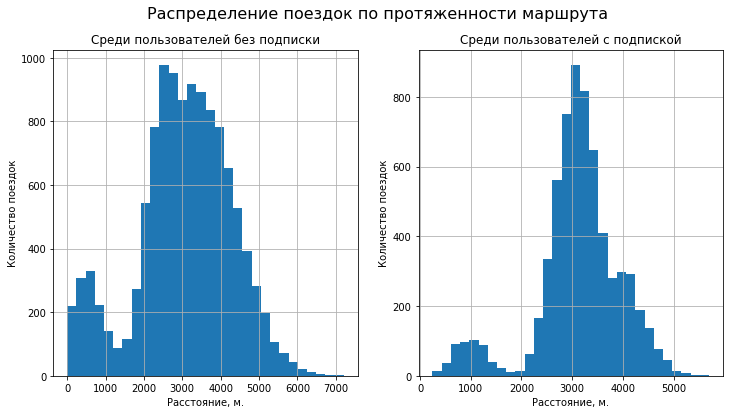

In [ ]:
vizualize(df_free['distance'],
          df_ultra['distance'],
          'Расстояние, м.',
          'Распределение поездок по протяженности маршрута')

Маршруты менее 1000 м. более распространенны среди пользователей без подписки, в остальном распределения схожи.

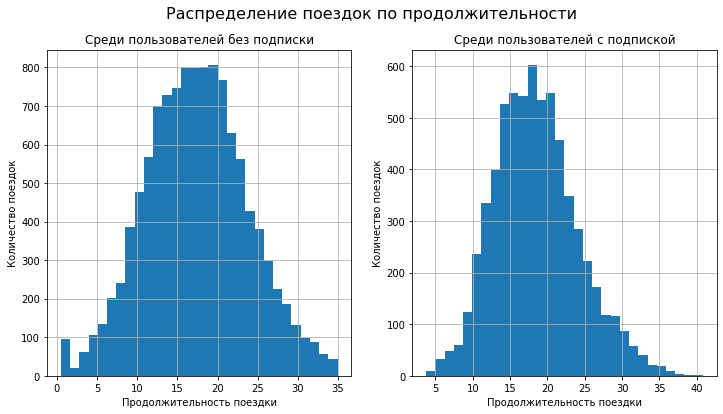

In [ ]:
vizualize(df_free['duration'],
          df_ultra['duration'],
          'Продолжительность поездки',
          'Распределение поездок по продолжительности')

Распределение поездок по продолжительности, также, отличается несущественно, наиболее распространенны (среди обеих категорий пользователей) поездки длительностью от 15 до 20 минут.

#### Шаг 5. Подсчёт выручки

In [ ]:
# Считаем для каждого пользователя суммарное расстояние,
# суммарную продолжительность и количество поездок по месяцам
revenue_df = df.pivot_table(index=['user_id', 'month'],
                        values=['distance', 'duration'],
                        aggfunc=['sum', 'count'])
# Переименуем столбцы
revenue_df.columns = ['distance_sum',
                   'duration_sum',
                   'rides_count',
                   'rides_count_duplicate']
# Т.к. count() применялся дважды, образовался лишний столбец
# удалим его
revenue_df = revenue_df.drop(columns='rides_count_duplicate')
revenue_df.head(15)

distance_sum  duration_sum  rides_count
user_id month                                         
1       1       7027.511294     41.416640            2
        4        754.159807      6.232113            1
        8       6723.470560     44.776802            2
        10      5809.911100     31.578017            2
        11      7003.499363     53.397424            3
        12      6751.629942     27.203912            2
2       3      10187.723006     60.959959            3
        4       6164.381824     39.048633            2
        6       3255.338202     13.851127            1
        7       6780.722964     46.170157            2
        8        923.007439      6.914760            1
        10      2824.636598     18.779128            1
        12      3828.248580     11.920514            1
3       1       3061.777147     12.654443            1
        2       5421.152016     37.568637            2

In [ ]:
# Избавимся от мультииндексов
revenue_df = revenue_df.reset_index()

revenue_df.head(15)

,user_id,month,distance_sum,duration_sum,rides_count
0,1,1,7027.511294,41.416640,2
1,1,4,754.159807,6.232113,1
2,1,8,6723.470560,44.776802,2
3,1,10,5809.911100,31.578017,2
4,1,11,7003.499363,53.397424,3
5,1,12,6751.629942,27.203912,2
6,2,3,10187.723006,60.959959,3
7,2,4,6164.381824,39.048633,2
8,2,6,3255.338202,13.851127,1
9,2,7,6780.722964,46.170157,2


Стоимость:  
без подписки  
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;  

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

In [ ]:
# Посчитаем помесячную выручку в зависимости от наличия подписки
revenue_df['revenue'] = np.where(
    revenue_df['user_id'].isin(df_free['user_id']),
    (np.ceil(revenue_df['duration_sum']) * 8) + (revenue_df['rides_count'] * 50),
    (np.ceil(revenue_df['duration_sum']) * 6) + 199
  )

In [ ]:
revenue_df.head(20)

,user_id,month,distance_sum,duration_sum,rides_count,revenue
0,1,1,7027.511294,41.416640,2,451.0
1,1,4,754.159807,6.232113,1,241.0
2,1,8,6723.470560,44.776802,2,469.0
3,1,10,5809.911100,31.578017,2,391.0
4,1,11,7003.499363,53.397424,3,523.0
5,1,12,6751.629942,27.203912,2,367.0
6,2,3,10187.723006,60.959959,3,565.0
7,2,4,6164.381824,39.048633,2,439.0
8,2,6,3255.338202,13.851127,1,283.0
9,2,7,6780.722964,46.170157,2,481.0


#### Шаг 6. Проверка гипотез

6.1. Тратят ли пользователи с подпиской больше времени на поездки?

H0: Пользователи с подпиской тратят на поездки не больше времени, чем пользователи без подписки.  
H1: Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

In [ ]:
alpha = 0.05

results = st.ttest_ind(df_ultra['duration'],
                       df_free['duration'],
                       alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
  print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу в пользу альтернативной


В среднем пользователи с подпиской тратят больше времени на поездки.

6.2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

H0: Среднее расстояние, которое пользователи с подпиской проезжают за 1 поездку, не превышает 3130 м.  
H1: Среднее расстояние, которое пользователи с подпиской проезжают за 1 поездку, больше 3130 м.

In [ ]:
alpha = 0.05

results = st.ttest_1samp(df_ultra['distance'], 3130,
                         alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
  print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу в пользу альтернативной, следовательно средняя продолжительность поездки среди пользователей с подпиской не превышает 3130

6.3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

H0: Помесячная выручка от пользователей с подпиской не выше, чем выручка от пользователей без подписки.  
H1: Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [ ]:
#Разделим данные о выручке по типам подписки
revenue_ultra_df = revenue_df[
    revenue_df['user_id'].isin(df_ultra['user_id'])
]

revenue_free_df = revenue_df[
    revenue_df['user_id'].isin(df_free['user_id'])
]

In [ ]:
alpha = 0.05

results = st.ttest_ind(revenue_ultra_df['revenue'],
                       revenue_free_df['revenue'],
                       alternative='greater')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
  print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8130926188487286e-35
Отвергаем нулевую гипотезу в пользу альтернативной


Действительно, по имеющимся данным средняя помесячная выручка среди пользователей с подпиской больше, чем от пользователей без подписки.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** Для проверки этой гипотезы я бы исполььзовала st.ttest_rel(), поскольку рассматриваемые в данном случае выборки являлись бы зависимыми, т.к. в них содержались бы данные по одним и тем же пользователям до/после обновления.

# Общий вывод

В ходе работы были предобработаны данные: удалены дубликаты, изменены типы данных там, где это требовалось. Аномальных или пропущенных значений обнаружено не было. Также был проведён исследовательский анализ данных, в результате которого было установлено:  
- Больше всего пользователей в Пятигорске, меньше всего в Москве, при этом разница невелика - 3%;  
- Пользователей с подпиской на 8% меньше, чем без подписки;  
- Средний возраст пользователей приложения составляет 25 лет, при этом самому молодому пользователю - 12 лет, самому взрослому - 43 года;  
- Большая часть поездок осуществляется по маршрутам протяженностью от 3000 до 3200 м.  
- Средняя и медианная длительность поездки составляет 17,7 - 17,8 минут.  
Затем осуществлялась проверка ряда статистических гипотез, результаты которой показали, что:
- В среднем пользователи с подпиской тратят больше времени на поездки.  
- Средняя продолжительность поездки среди пользователей с подпиской не превышает 3130.  
- Помесячная выручка среди пользователей с подпиской больше, чем от пользователей без подписки.